In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df=pd.read_csv('data/train_santander.csv',encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [5]:
cust_df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [16]:
unsatisfied_cnt=cust_df[cust_df['TARGET']==1]['TARGET'].count()
total_cnt=cust_df["TARGET"].count()
unsatisfied_cnt/total_cnt

0.0395685345961589

In [18]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [30]:
cust_df['var3'].value_counts()[-999999]

116

In [31]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

In [34]:
X_features=cust_df.iloc[:,:-1]
y_labels=cust_df.iloc[:,-1]

In [37]:
X_features.shape

(76020, 369)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_features,y_labels,random_state=0,test_size=.2)
train_cnt=X_train.shape[0]
test_cnt=X_test.shape[0]
print('Train Set Shape:{}\nTest Set Shape:{}'.format(X_train.shape,X_test.shape))
print('Train Set Label Distribution')
print(y_train.value_counts()/train_cnt)
print('Test Set Label Distribution')
print(y_test.value_counts()/test_cnt)

Train Set Shape:(60816, 369)
Test Set Shape:(15204, 369)
Train Set Label Distribution
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
Test Set Label Distribution
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
xgb_clf=XGBClassifier(n_estimators=500,random_state=156)
xgb_clf.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="auc",
            eval_set=[(X_train,y_train),(X_test,y_test)])
xgb_roc_score=roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_clf=XGBClassifier(n_estimators=100)
params={'max_depth':[5,7],'min_child_weight':[1,3],'colsample_bytree':[0.5,0.75]}
gridcv=GridSearchCV(xgb_clf,param_grid=params)
gridcv.fit(X_train,y_train,early_stopping_rounds=30,eval_metric='auc',
          eval_set=[(X_train,y_train),(X_test,y_test)])
print(gridcv.best_params_)
xgb_roc_score=roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {:.4f}'.format(xgb_roc_score))


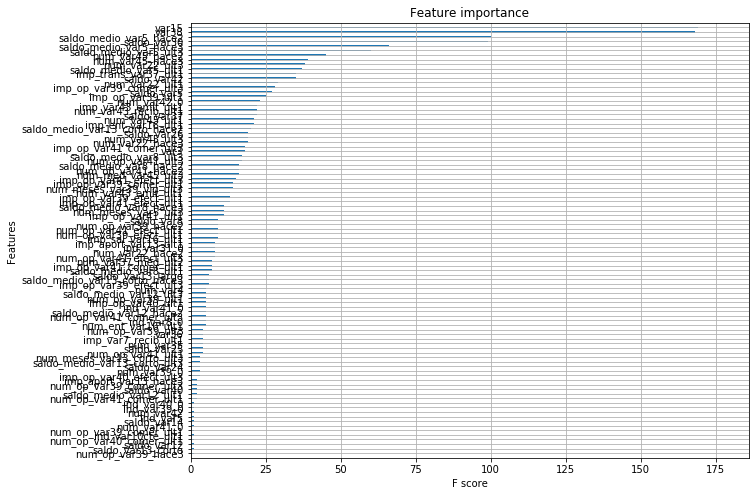

In [53]:
from xgboost import plot_importance
fig,ax=plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf,ax=ax,show_values=False,height=0.3)

In [54]:
from lightgbm import LGBMClassifier
lgbm_clf=LGBMClassifier(n_estimators=500)
evals=[(X_test,y_test)]
lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="auc",
            eval_set=evals)
lgbm_roc_score=roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[129]	valid_0's auc: 0.836156	valid_0's binary_logloss: 0.140809
[130]	valid_0's auc: 0.83605	valid_0's binary_logloss: 0.140835
[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.13940

In [56]:
from sklearn.model_selection import GridSearchCV
LGBM_clf=LGBMClassifier(n_estimators=200)
params={'num_leaves':[32,64],'max_depth':[128,160],'min_child_samples':[60,100],
       'subsample':[0.8,1]}
gridcv=GridSearchCV(lgbm_clf,param_grid=params)
gridcv.fit(X_train,y_train,early_stopping_rounds=30,eval_metric="auc",eval_set=[(X_train,y_train),
                                                                               (X_test,y_test)])
print(gridcv.best_params_)
lgbm_roc_score=roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUD: {:.4f}'.format(lgbm_roc_score))


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	va

[30]	valid_0's auc: 0.874647	valid_0's binary_logloss: 0.124019	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.13958
[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 0.878189	valid_0's binary_logloss: 0.122925	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139567
[35]	valid_0's auc: 0.878765	valid_0's binary_logloss: 0.122704	valid_1's auc: 0.838946	valid_1's binary_logloss: 0.139572
[36]	valid_0's auc: 0.879377	valid_0's binary_logloss: 0.122448	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.139554
[37]	valid_0's auc: 0.880134	valid_0's binary_logloss: 0.122143	valid_1's auc: 0.838888	valid_1's binary_logloss: 0.139557
[38]	valid_0's auc: 

[39]	valid_0's auc: 0.879978	valid_0's binary_logloss: 0.122126	valid_1's auc: 0.83945	valid_1's binary_logloss: 0.139391
[40]	valid_0's auc: 0.880399	valid_0's binary_logloss: 0.121938	valid_1's auc: 0.840127	valid_1's binary_logloss: 0.139314
[41]	valid_0's auc: 0.880914	valid_0's binary_logloss: 0.121757	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.13937
[42]	valid_0's auc: 0.881674	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.839744	valid_1's binary_logloss: 0.139371
[43]	valid_0's auc: 0.882352	valid_0's binary_logloss: 0.121291	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.139358
[44]	valid_0's auc: 0.882869	valid_0's binary_logloss: 0.121117	valid_1's auc: 0.839827	valid_1's binary_logloss: 0.13937
[45]	valid_0's auc: 0.883308	valid_0's binary_logloss: 0.120912	valid_1's auc: 0.839923	valid_1's binary_logloss: 0.139325
[46]	valid_0's auc: 0.883814	valid_0's binary_logloss: 0.120682	valid_1's auc: 0.83985	valid_1's binary_logloss: 0.139336
[47]	valid_0's auc: 

[10]	valid_0's auc: 0.85454	valid_0's binary_logloss: 0.134224	valid_1's auc: 0.838661	valid_1's binary_logloss: 0.144501
[11]	valid_0's auc: 0.856414	valid_0's binary_logloss: 0.133277	valid_1's auc: 0.838921	valid_1's binary_logloss: 0.143737
[12]	valid_0's auc: 0.857283	valid_0's binary_logloss: 0.132431	valid_1's auc: 0.837263	valid_1's binary_logloss: 0.143197
[13]	valid_0's auc: 0.858075	valid_0's binary_logloss: 0.131688	valid_1's auc: 0.837254	valid_1's binary_logloss: 0.142633
[14]	valid_0's auc: 0.858945	valid_0's binary_logloss: 0.130983	valid_1's auc: 0.837669	valid_1's binary_logloss: 0.142158
[15]	valid_0's auc: 0.859875	valid_0's binary_logloss: 0.130335	valid_1's auc: 0.837434	valid_1's binary_logloss: 0.141848
[16]	valid_0's auc: 0.860979	valid_0's binary_logloss: 0.129731	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.141492
[17]	valid_0's auc: 0.861681	valid_0's binary_logloss: 0.129123	valid_1's auc: 0.837851	valid_1's binary_logloss: 0.14114
[18]	valid_0's auc

[21]	valid_0's auc: 0.866258	valid_0's binary_logloss: 0.127436	valid_1's auc: 0.83993	valid_1's binary_logloss: 0.140328
[22]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.127069	valid_1's auc: 0.840099	valid_1's binary_logloss: 0.14013
[23]	valid_0's auc: 0.867852	valid_0's binary_logloss: 0.126713	valid_1's auc: 0.839768	valid_1's binary_logloss: 0.140027
[24]	valid_0's auc: 0.868599	valid_0's binary_logloss: 0.126372	valid_1's auc: 0.840299	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[26]	valid_0's auc: 0.870541	valid_0's binary_logloss: 0.125627	valid_1's auc: 0.840242	valid_1's binary_logloss: 0.139708
[27]	valid_0's auc: 0.871191	valid_0's binary_logloss: 0.125319	valid_1's auc: 0.839924	valid_1's binary_logloss: 0.139651
[28]	valid_0's auc: 0.871788	valid_0's binary_logloss: 0.125064	valid_1's auc: 0.839647	valid_1's binary_logloss: 0.139574
[29]	valid_0's auc

[33]	valid_0's auc: 0.891896	valid_0's binary_logloss: 0.117633	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.141488
[34]	valid_0's auc: 0.892553	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.82916	valid_1's binary_logloss: 0.141607
[35]	valid_0's auc: 0.893197	valid_0's binary_logloss: 0.116998	valid_1's auc: 0.828503	valid_1's binary_logloss: 0.141781
[36]	valid_0's auc: 0.894242	valid_0's binary_logloss: 0.116658	valid_1's auc: 0.828875	valid_1's binary_logloss: 0.141779
Early stopping, best iteration is:
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logl

[15]	valid_0's auc: 0.873589	valid_0's binary_logloss: 0.126603	valid_1's auc: 0.837256	valid_1's binary_logloss: 0.141869
[16]	valid_0's auc: 0.875441	valid_0's binary_logloss: 0.125783	valid_1's auc: 0.837912	valid_1's binary_logloss: 0.141528
[17]	valid_0's auc: 0.877154	valid_0's binary_logloss: 0.125036	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.141384
[18]	valid_0's auc: 0.878205	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.141256
[19]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.12371	valid_1's auc: 0.835242	valid_1's binary_logloss: 0.141186
[20]	valid_0's auc: 0.880623	valid_0's binary_logloss: 0.123116	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.140946
[21]	valid_0's auc: 0.881898	valid_0's binary_logloss: 0.122562	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.140914
[22]	valid_0's auc: 0.882919	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.140596
[23]	valid_0's auc

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	v

[22]	valid_0's auc: 0.882919	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.140596
[23]	valid_0's auc: 0.88356	valid_0's binary_logloss: 0.121524	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.140423
[24]	valid_0's auc: 0.884733	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.140282
[25]	valid_0's auc: 0.885783	valid_0's binary_logloss: 0.120481	valid_1's auc: 0.837461	valid_1's binary_logloss: 0.140158
[26]	valid_0's auc: 0.887006	valid_0's binary_logloss: 0.119965	valid_1's auc: 0.837303	valid_1's binary_logloss: 0.140169
[27]	valid_0's auc: 0.887947	valid_0's binary_logloss: 0.119452	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140113
[28]	valid_0's auc: 0.888786	valid_0's binary_logloss: 0.11903	valid_1's auc: 0.837108	valid_1's binary_logloss: 0.140154
[29]	valid_0's auc: 0.890614	valid_0's binary_logloss: 0.118542	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.14008
[30]	valid_0's auc: 

[9]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.135648	valid_1's auc: 0.83787	valid_1's binary_logloss: 0.145198
[10]	valid_0's auc: 0.85449	valid_0's binary_logloss: 0.134596	valid_1's auc: 0.837845	valid_1's binary_logloss: 0.144271
[11]	valid_0's auc: 0.855485	valid_0's binary_logloss: 0.133677	valid_1's auc: 0.838688	valid_1's binary_logloss: 0.14351
[12]	valid_0's auc: 0.856918	valid_0's binary_logloss: 0.132832	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.142834
[13]	valid_0's auc: 0.857461	valid_0's binary_logloss: 0.132079	valid_1's auc: 0.838477	valid_1's binary_logloss: 0.142308
[14]	valid_0's auc: 0.858342	valid_0's binary_logloss: 0.131428	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.141925
[15]	valid_0's auc: 0.858926	valid_0's binary_logloss: 0.130816	valid_1's auc: 0.838543	valid_1's binary_logloss: 0.141466
[16]	valid_0's auc: 0.859532	valid_0's binary_logloss: 0.130275	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.141112
[17]	valid_0's auc: 

[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063
[48]	valid_0's auc: 0.880499	valid_0's binary_logloss: 0.121624	valid_1's auc: 0.840013	valid_1's binary_logloss: 0.139091
[49]	valid_0's auc: 0.880866	valid_0's binary_logloss: 0.121448	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139167
[50]	valid_0's auc

[31]	valid_0's auc: 0.871414	valid_0's binary_logloss: 0.125161	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.140216
[32]	valid_0's auc: 0.872281	valid_0's binary_logloss: 0.12493	valid_1's auc: 0.833344	valid_1's binary_logloss: 0.140148
[33]	valid_0's auc: 0.873038	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.140091
[34]	valid_0's auc: 0.873571	valid_0's binary_logloss: 0.124499	valid_1's auc: 0.833239	valid_1's binary_logloss: 0.140069
[35]	valid_0's auc: 0.874263	valid_0's binary_logloss: 0.124311	valid_1's auc: 0.833202	valid_1's binary_logloss: 0.140067
[36]	valid_0's auc: 0.87467	valid_0's binary_logloss: 0.124165	valid_1's auc: 0.833345	valid_1's binary_logloss: 0.140029
[37]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.123937	valid_1's auc: 0.833447	valid_1's binary_logloss: 0.140009
[38]	valid_0's auc: 0.876178	valid_0's binary_logloss: 0.123686	valid_1's auc: 0.833499	valid_1's binary_logloss: 0.139986
[39]	valid_0's auc

[22]	valid_0's auc: 0.865066	valid_0's binary_logloss: 0.127776	valid_1's auc: 0.838552	valid_1's binary_logloss: 0.140268
[23]	valid_0's auc: 0.866036	valid_0's binary_logloss: 0.127415	valid_1's auc: 0.838667	valid_1's binary_logloss: 0.140163
[24]	valid_0's auc: 0.866894	valid_0's binary_logloss: 0.127047	valid_1's auc: 0.838711	valid_1's binary_logloss: 0.139983
[25]	valid_0's auc: 0.867646	valid_0's binary_logloss: 0.126759	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.13986
[26]	valid_0's auc: 0.868321	valid_0's binary_logloss: 0.126486	valid_1's auc: 0.83866	valid_1's binary_logloss: 0.139795
[27]	valid_0's auc: 0.869533	valid_0's binary_logloss: 0.126137	valid_1's auc: 0.838474	valid_1's binary_logloss: 0.13973
[28]	valid_0's auc: 0.87009	valid_0's binary_logloss: 0.125841	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.139661
[29]	valid_0's auc: 0.870611	valid_0's binary_logloss: 0.125574	valid_1's auc: 0.838527	valid_1's binary_logloss: 0.139586
[30]	valid_0's auc: 0

[13]	valid_0's auc: 0.868751	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.142853
[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.871366	valid_0's binary_logloss: 0.127828	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.142173
[16]	valid_0's auc: 0.87234	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.834555	valid_1's binary_logloss: 0.141876
[17]	valid_0's auc: 0.872963	valid_0's binary_logloss: 0.126553	valid_1's auc: 0.833341	valid_1's binary_logloss: 0.141845
[18]	valid_0's auc: 0.874019	valid_0's binary_logloss: 0.125934	valid_1's auc: 0.833684	valid_1's binary_logloss: 0.141515
[19]	valid_0's auc: 0.875288	valid_0's binary_logloss: 0.125352	valid_1's auc: 0.832788	valid_1's binary_logloss: 0.141499
[20]	valid_0's auc: 0.876379	valid_0's binary_logloss: 0.124793	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.141369
[21]	valid_0's au

[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc: 0.895447	valid_0's binary_logloss: 0.116421	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.139143
[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.115822	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.139263
[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc: 0.898208	valid_0's binary_logloss: 0.115195	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.139312
[44]	valid_0's auc: 0.899032	valid_0's binary_logloss: 0.114921	valid_1's auc: 0.837956	valid_1's binary_logloss: 0.139352
[45]	valid_0's auc: 0.899435	valid_0's binary_logloss: 0.114646	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.139425
[46]	valid_0's auc

[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.871366	valid_0's binary_logloss: 0.127828	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.142173
[16]	valid_0's auc: 0.87234	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.834555	valid_1's binary_logloss: 0.141876
[17]	valid_0's auc: 0.872963	valid_0's binary_logloss: 0.126553	valid_1's auc: 0.833341	valid_1's binary_logloss: 0.141845
[18]	valid_0's auc: 0.874019	valid_0's binary_logloss: 0.125934	valid_1's auc: 0.833684	valid_1's binary_logloss: 0.141515
[19]	valid_0's auc: 0.875288	valid_0's binary_logloss: 0.125352	valid_1's auc: 0.832788	valid_1's binary_logloss: 0.141499
[20]	valid_0's auc: 0.876379	valid_0's binary_logloss: 0.124793	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.141369
[21]	valid_0's auc: 0.877634	valid_0's binary_logloss: 0.124225	valid_1's auc: 0.832355	valid_1's binary_logloss: 0.141226
[22]	valid_0's au

[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.115822	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.139263
[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc: 0.898208	valid_0's binary_logloss: 0.115195	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.139312
[44]	valid_0's auc: 0.899032	valid_0's binary_logloss: 0.114921	valid_1's auc: 0.837956	valid_1's binary_logloss: 0.139352
[45]	valid_0's auc: 0.899435	valid_0's binary_logloss: 0.114646	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.139425
[46]	valid_0's auc: 0.899904	valid_0's binary_logloss: 0.114381	valid_1's auc: 0.837191	valid_1's binary_logloss: 0.139562
[47]	valid_0's auc: 0.900313	valid_0's binary_logloss: 0.114172	valid_1's auc: 0.837275	valid_1's binary_logloss: 0.139576
[48]	valid_0's au

[12]	valid_0's auc: 0.855304	valid_0's binary_logloss: 0.132409	valid_1's auc: 0.838786	valid_1's binary_logloss: 0.142878
[13]	valid_0's auc: 0.856638	valid_0's binary_logloss: 0.131658	valid_1's auc: 0.838632	valid_1's binary_logloss: 0.142368
[14]	valid_0's auc: 0.85784	valid_0's binary_logloss: 0.130967	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.14198
[15]	valid_0's auc: 0.859432	valid_0's binary_logloss: 0.130373	valid_1's auc: 0.838236	valid_1's binary_logloss: 0.141582
[16]	valid_0's auc: 0.860428	valid_0's binary_logloss: 0.129814	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.141389
[17]	valid_0's auc: 0.861409	valid_0's binary_logloss: 0.12923	valid_1's auc: 0.837358	valid_1's binary_logloss: 0.141106
[18]	valid_0's auc: 0.86332	valid_0's binary_logloss: 0.128681	valid_1's auc: 0.836771	valid_1's binary_logloss: 0.140932
[19]	valid_0's auc: 0.864365	valid_0's binary_logloss: 0.128233	valid_1's auc: 0.836564	valid_1's binary_logloss: 0.140796
[20]	valid_0's auc: 

[42]	valid_0's auc: 0.882625	valid_0's binary_logloss: 0.121107	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139554
[43]	valid_0's auc: 0.882956	valid_0's binary_logloss: 0.120926	valid_1's auc: 0.83914	valid_1's binary_logloss: 0.139546
[44]	valid_0's auc: 0.883618	valid_0's binary_logloss: 0.120726	valid_1's auc: 0.838905	valid_1's binary_logloss: 0.139592
[45]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.120513	valid_1's auc: 0.838587	valid_1's binary_logloss: 0.139651
[46]	valid_0's auc: 0.884555	valid_0's binary_logloss: 0.120339	valid_1's auc: 0.838288	valid_1's binary_logloss: 0.139703
[47]	valid_0's auc: 0.884789	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.838155	valid_1's binary_logloss: 0.139692
[48]	valid_0's auc: 0.884968	valid_0's binary_logloss: 0.120074	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.139667
[49]	valid_0's auc: 0.885336	valid_0's binary_logloss: 0.119939	valid_1's auc: 0.83827	valid_1's binary_logloss: 0.13968
[50]	valid_0's auc: 0.8

[53]	valid_0's auc: 0.886187	valid_0's binary_logloss: 0.119567	valid_1's auc: 0.839723	valid_1's binary_logloss: 0.139436
[54]	valid_0's auc: 0.886397	valid_0's binary_logloss: 0.11943	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139424
[55]	valid_0's auc: 0.886702	valid_0's binary_logloss: 0.119279	valid_1's auc: 0.839951	valid_1's binary_logloss: 0.139433
Early stopping, best iteration is:
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logl

[23]	valid_0's auc: 0.868624	valid_0's binary_logloss: 0.126281	valid_1's auc: 0.838987	valid_1's binary_logloss: 0.140028
[24]	valid_0's auc: 0.869855	valid_0's binary_logloss: 0.125882	valid_1's auc: 0.838802	valid_1's binary_logloss: 0.139975
[25]	valid_0's auc: 0.870426	valid_0's binary_logloss: 0.125541	valid_1's auc: 0.83912	valid_1's binary_logloss: 0.139815
[26]	valid_0's auc: 0.871649	valid_0's binary_logloss: 0.125171	valid_1's auc: 0.838779	valid_1's binary_logloss: 0.139741
[27]	valid_0's auc: 0.872513	valid_0's binary_logloss: 0.124859	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.139648
[28]	valid_0's auc: 0.873252	valid_0's binary_logloss: 0.124586	valid_1's auc: 0.839378	valid_1's binary_logloss: 0.139578
[29]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.124271	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139581
[30]	valid_0's auc: 0.874647	valid_0's binary_logloss: 0.124019	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.13958
[31]	valid_0's auc: 

[29]	valid_0's auc: 0.872714	valid_0's binary_logloss: 0.124726	valid_1's auc: 0.840154	valid_1's binary_logloss: 0.139481
[30]	valid_0's auc: 0.873746	valid_0's binary_logloss: 0.124416	valid_1's auc: 0.839602	valid_1's binary_logloss: 0.139497
[31]	valid_0's auc: 0.874715	valid_0's binary_logloss: 0.124154	valid_1's auc: 0.839072	valid_1's binary_logloss: 0.139568
[32]	valid_0's auc: 0.875774	valid_0's binary_logloss: 0.123879	valid_1's auc: 0.838748	valid_1's binary_logloss: 0.139579
[33]	valid_0's auc: 0.876333	valid_0's binary_logloss: 0.123614	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.139492
[34]	valid_0's auc: 0.876841	valid_0's binary_logloss: 0.123372	valid_1's auc: 0.839078	valid_1's binary_logloss: 0.139459
[35]	valid_0's auc: 0.877422	valid_0's binary_logloss: 0.123118	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139362
[36]	valid_0's auc: 0.878163	valid_0's binary_logloss: 0.122873	valid_1's auc: 0.839157	valid_1's binary_logloss: 0.139395
[37]	valid_0's au

[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	valid_1's binary_logloss: 0.146178
[9]	valid_0's auc: 0.865562	valid_0's binary_logloss: 0.132428	valid_1's auc: 0.836038	valid_1's binary_logloss: 0.145107
[10]	valid_0's auc: 0.867401	valid_0's binary_logloss: 0.131116	valid_1's auc: 0.836429	valid_1's binary_logloss: 0.144153
[11]	valid_0's auc: 0.868477	valid_0's binary_logloss: 0.129981	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.143351
[12]	valid_0's auc: 0.87007	valid_0's binary_logloss: 0.128907	valid_1's auc: 0.836122	valid_1's binary_logloss: 0.142803
[13]	valid_0's auc: 0.8711	valid_0's binary_logloss: 0.127994	valid_1's auc: 0.836547	valid_1's binary_logloss: 0.142243
[14]	valid_0's auc: 0.872903	valid_0's binary_logloss: 0.127122	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141718
[15]	valid_0's auc: 0.

[29]	valid_0's auc: 0.890614	valid_0's binary_logloss: 0.118542	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.14008
[30]	valid_0's auc: 0.891023	valid_0's binary_logloss: 0.118199	valid_1's auc: 0.83748	valid_1's binary_logloss: 0.140051
[31]	valid_0's auc: 0.891989	valid_0's binary_logloss: 0.117866	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.140006
[32]	valid_0's auc: 0.892909	valid_0's binary_logloss: 0.117477	valid_1's auc: 0.83708	valid_1's binary_logloss: 0.140054
[33]	valid_0's auc: 0.893597	valid_0's binary_logloss: 0.117091	valid_1's auc: 0.836874	valid_1's binary_logloss: 0.140061
[34]	valid_0's auc: 0.894331	valid_0's binary_logloss: 0.116711	valid_1's auc: 0.836404	valid_1's binary_logloss: 0.140111
[35]	valid_0's auc: 0.895331	valid_0's binary_logloss: 0.116306	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139942
[36]	valid_0's auc: 0.895954	valid_0's binary_logloss: 0.115973	valid_1's auc: 0.837138	valid_1's binary_logloss: 0.139958
[37]	valid_0's auc:

[14]	valid_0's auc: 0.872903	valid_0's binary_logloss: 0.127122	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141718
[15]	valid_0's auc: 0.874543	valid_0's binary_logloss: 0.126262	valid_1's auc: 0.837921	valid_1's binary_logloss: 0.141291
[16]	valid_0's auc: 0.876148	valid_0's binary_logloss: 0.1255	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.14114
[17]	valid_0's auc: 0.878214	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140905
[18]	valid_0's auc: 0.879554	valid_0's binary_logloss: 0.124053	valid_1's auc: 0.836497	valid_1's binary_logloss: 0.140787
[19]	valid_0's auc: 0.880715	valid_0's binary_logloss: 0.123405	valid_1's auc: 0.837087	valid_1's binary_logloss: 0.140481
[20]	valid_0's auc: 0.881492	valid_0's binary_logloss: 0.122867	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.140353
[21]	valid_0's auc: 0.882521	valid_0's binary_logloss: 0.122301	valid_1's auc: 0.836676	valid_1's binary_logloss: 0.140236
[22]	valid_0's auc: 

[39]	valid_0's auc: 0.897605	valid_0's binary_logloss: 0.115043	valid_1's auc: 0.836359	valid_1's binary_logloss: 0.140104
[40]	valid_0's auc: 0.898073	valid_0's binary_logloss: 0.114754	valid_1's auc: 0.836432	valid_1's binary_logloss: 0.140096
[41]	valid_0's auc: 0.898701	valid_0's binary_logloss: 0.114389	valid_1's auc: 0.836355	valid_1's binary_logloss: 0.140115
[42]	valid_0's auc: 0.898936	valid_0's binary_logloss: 0.114144	valid_1's auc: 0.836485	valid_1's binary_logloss: 0.14011
[43]	valid_0's auc: 0.899275	valid_0's binary_logloss: 0.11385	valid_1's auc: 0.836213	valid_1's binary_logloss: 0.140214
Early stopping, best iteration is:
[13]	valid_0's auc: 0.870662	valid_0's binary_logloss: 0.128333	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.142696
[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829172	valid_0's binary_l

[24]	valid_0's auc: 0.866662	valid_0's binary_logloss: 0.126815	valid_1's auc: 0.837785	valid_1's binary_logloss: 0.139755
[25]	valid_0's auc: 0.867441	valid_0's binary_logloss: 0.126498	valid_1's auc: 0.838008	valid_1's binary_logloss: 0.139673
[26]	valid_0's auc: 0.86805	valid_0's binary_logloss: 0.126176	valid_1's auc: 0.838301	valid_1's binary_logloss: 0.139585
[27]	valid_0's auc: 0.868525	valid_0's binary_logloss: 0.12589	valid_1's auc: 0.838152	valid_1's binary_logloss: 0.139564
[28]	valid_0's auc: 0.869107	valid_0's binary_logloss: 0.125656	valid_1's auc: 0.838221	valid_1's binary_logloss: 0.139481
[29]	valid_0's auc: 0.869754	valid_0's binary_logloss: 0.12538	valid_1's auc: 0.838255	valid_1's binary_logloss: 0.139428
[30]	valid_0's auc: 0.87056	valid_0's binary_logloss: 0.125113	valid_1's auc: 0.838733	valid_1's binary_logloss: 0.139354
[31]	valid_0's auc: 0.871162	valid_0's binary_logloss: 0.124861	valid_1's auc: 0.838979	valid_1's binary_logloss: 0.139225
[32]	valid_0's auc: 

[56]	valid_0's auc: 0.883389	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.83979	valid_1's binary_logloss: 0.139326
[57]	valid_0's auc: 0.88369	valid_0's binary_logloss: 0.120248	valid_1's auc: 0.839887	valid_1's binary_logloss: 0.139321
[58]	valid_0's auc: 0.884025	valid_0's binary_logloss: 0.120078	valid_1's auc: 0.839684	valid_1's binary_logloss: 0.139341
[59]	valid_0's auc: 0.884477	valid_0's binary_logloss: 0.119928	valid_1's auc: 0.839523	valid_1's binary_logloss: 0.139368
[60]	valid_0's auc: 0.884659	valid_0's binary_logloss: 0.119822	valid_1's auc: 0.839745	valid_1's binary_logloss: 0.139362
[61]	valid_0's auc: 0.885121	valid_0's binary_logloss: 0.119618	valid_1's auc: 0.839533	valid_1's binary_logloss: 0.139434
[62]	valid_0's auc: 0.885341	valid_0's binary_logloss: 0.119477	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139385
[63]	valid_0's auc: 0.885487	valid_0's binary_logloss: 0.119367	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139409
[64]	valid_0's auc

[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	valid_1's binary_logloss: 0.146175
[9]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.135648	valid_1's auc: 0.83787	valid_1's binary_logloss: 0.145198
[10]	valid_0's auc: 0.85449	valid_0's binary_logloss: 0.134596	valid_1's auc: 0.837845	valid_1's binary_logloss: 0.144271
[11]	valid_0's auc: 0.855485	valid_0's binary_logloss: 0.133677	valid_1's auc: 0.838688	valid_1's binary_logloss: 0.14351
[12]	valid_0's auc: 0.856918	valid_0's binary_logloss: 0.132832	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.142834
[13]	valid_0's auc: 0.857461	valid_0's binary_logloss: 0.132079	valid_1's auc: 0.838477	valid_1's binary_logloss: 0.142308
[14]	valid_0's auc: 0.858342	valid_0's binary_logloss: 0.131428	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.141925
[15]	valid_0's auc: 0.858926	valid_0's binary_logloss: 0.130816	valid_1's auc: 0.838543	valid_1's binary_logloss: 0.141466
[16]	valid_0's auc: 0.

[40]	valid_0's auc: 0.877543	valid_0's binary_logloss: 0.123003	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.139144
[41]	valid_0's auc: 0.877994	valid_0's binary_logloss: 0.122806	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.139157
[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063
[48]	valid_0's auc

[28]	valid_0's auc: 0.884175	valid_0's binary_logloss: 0.121053	valid_1's auc: 0.831077	valid_1's binary_logloss: 0.140897
[29]	valid_0's auc: 0.885058	valid_0's binary_logloss: 0.120689	valid_1's auc: 0.831657	valid_1's binary_logloss: 0.140775
[30]	valid_0's auc: 0.885865	valid_0's binary_logloss: 0.120366	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.140767
[31]	valid_0's auc: 0.887114	valid_0's binary_logloss: 0.11994	valid_1's auc: 0.831439	valid_1's binary_logloss: 0.140816
[32]	valid_0's auc: 0.887603	valid_0's binary_logloss: 0.119623	valid_1's auc: 0.831023	valid_1's binary_logloss: 0.140912
[33]	valid_0's auc: 0.888164	valid_0's binary_logloss: 0.11928	valid_1's auc: 0.830667	valid_1's binary_logloss: 0.140953
[34]	valid_0's auc: 0.888957	valid_0's binary_logloss: 0.118937	valid_1's auc: 0.830222	valid_1's binary_logloss: 0.141016
[35]	valid_0's auc: 0.889746	valid_0's binary_logloss: 0.118573	valid_1's auc: 0.830175	valid_1's binary_logloss: 0.141039
[36]	valid_0's auc:

[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	v

[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's auc: 0.881533	valid_0's binary_logloss: 0.122313	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.140891
[26]	valid_0's auc: 0.882449	valid_0's binary_logloss: 0.121884	valid_1's auc: 0.832004	valid_1's binary_logloss: 0.140834
[27]	valid_0's auc: 0.883373	valid_0's binary_logloss: 0.121461	valid_1's auc: 0.83169	valid_1's binary_logloss: 0.140849
[28]	valid_0's auc: 0.884175	valid_0's binary_logloss: 0.121053	valid_1's auc: 0.831077	valid_1's binary_logloss: 0.140897
[29]	valid_0's auc: 0.885058	valid_0's binary_logloss: 0.120689	valid_1's auc: 0.831657	valid_1's binary_logloss: 0.140775
[30]	valid_0's auc: 0.885865	valid_0's binary_logloss: 0.120366	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.140767
[31]	valid_0's auc

[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	v

[25]	valid_0's auc: 0.875385	valid_0's binary_logloss: 0.125076	valid_1's auc: 0.843672	valid_1's binary_logloss: 0.138915
[26]	valid_0's auc: 0.876436	valid_0's binary_logloss: 0.12471	valid_1's auc: 0.843894	valid_1's binary_logloss: 0.138828
[27]	valid_0's auc: 0.877113	valid_0's binary_logloss: 0.124381	valid_1's auc: 0.843845	valid_1's binary_logloss: 0.138723
[28]	valid_0's auc: 0.878144	valid_0's binary_logloss: 0.12406	valid_1's auc: 0.843817	valid_1's binary_logloss: 0.138681
[29]	valid_0's auc: 0.879271	valid_0's binary_logloss: 0.123721	valid_1's auc: 0.844032	valid_1's binary_logloss: 0.13859
[30]	valid_0's auc: 0.87995	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.844089	valid_1's binary_logloss: 0.138538
[31]	valid_0's auc: 0.88069	valid_0's binary_logloss: 0.123148	valid_1's auc: 0.844137	valid_1's binary_logloss: 0.138484
[32]	valid_0's auc: 0.881743	valid_0's binary_logloss: 0.122823	valid_1's auc: 0.843246	valid_1's binary_logloss: 0.138591
[33]	valid_0's auc: 0

NameError: name 'rco_auc_score' is not defined

In [59]:
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=32,subsample=0.8,min_child_samples=100,
                       max_depth=128)
evals=[(X_test,y_test)]
lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="auc",eval_set=evals,verbose=False)
lgbm_roc_score=roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8442


In [60]:
test_df=pd.read_csv('data/test_santander.csv',encoding='latin-1')

In [66]:
test_df.drop('ID',axis=1,inplace=True)

In [65]:
ID

0             2
1             5
2             6
3             7
4             9
          ...  
75813    151831
75814    151832
75815    151833
75816    151834
75817    151837
Name: ID, Length: 75818, dtype: int64

In [78]:
predict=lgbm_clf.predict(test_df)

In [90]:
si=pd.Series(predict)

In [91]:
si

0        0
1        0
2        0
3        0
4        0
        ..
75813    0
75814    0
75815    0
75816    0
75817    0
Length: 75818, dtype: int64

In [102]:
IDlist=np.array(ID.tolist())

In [104]:
labelist=np.array(si.tolist())

In [111]:
IDlist.reshape(-1,1)
labelist.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [112]:
Hstack=np.hstack((IDlist.reshape(-1,1),labelist.reshape(-1,1)))

In [113]:
Hstack

array([[     2,      0],
       [     5,      0],
       [     6,      0],
       ...,
       [151833,      0],
       [151834,      0],
       [151837,      0]])

In [114]:
submission=pd.DataFrame(Hstack,columns=['ID','TARGET'])

In [139]:
submission.index = np.arange(0, len(submission))

In [140]:
submission

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [142]:
submission.to_csv('realrealsubmission_csv',index=False)

In [95]:
sample=pd.read_csv('data/sample_submission.csv')

In [133]:
sample.head(10)

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
5,11,0
6,12,0
7,15,0
8,16,0
9,17,0
